In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype

import warnings

warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

In [5]:
abalone = pd.read_csv('abalone.csv', sep=',')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 3. Univariate Analysis

In this section the distribution of each attribute is analyzed individually. We start analyzing the distribution of the target attribute *Rings*. The rest of the attributes are divided in groups for convenience of the analysis: a group called *Size*, containing attributes that represents the dimensions of an abalone, a group *Weight*, containing the different weight attributes and a third group composed only of the *Sex* attribute. The continous or quantitative attributes were analyzed using histograms and boxplots, while categorical attributes were analyzed using barplots. 

### 3.1. The Target Attribute

The analysis shows that the *Ring* attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of *Rings* are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

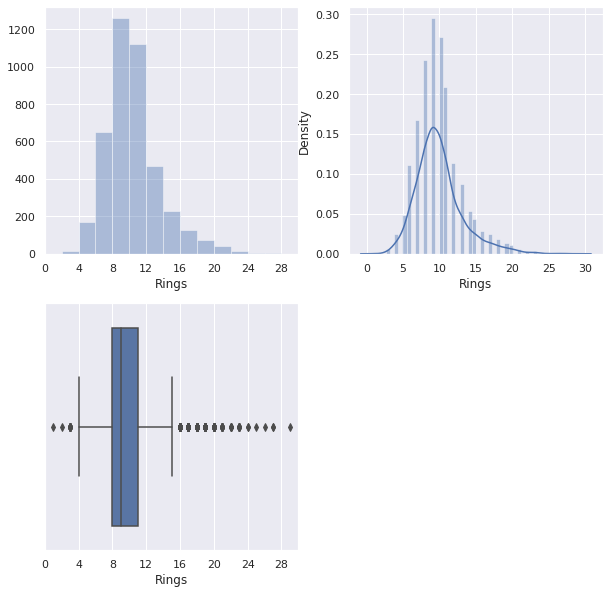

In [7]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(abalone['Rings'])

### 3.2. Size Attributes

In this section, we analyze the attributes that represents the dimensions of an abalone. These attributes are *Lenght*, *Diameter* and *Height*. For each of these attributes we plotted two histograms and their respective boxplot. The first histogram is a density histogram and a kernel density estimate, and the second is the absolute frquencies of the attribute, with some adjustments to ticks and bins. Once more, we observe an approximate normal distribution. However we notice the high peak formed by the *Height* histogram. Analyzing the *Height* boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.

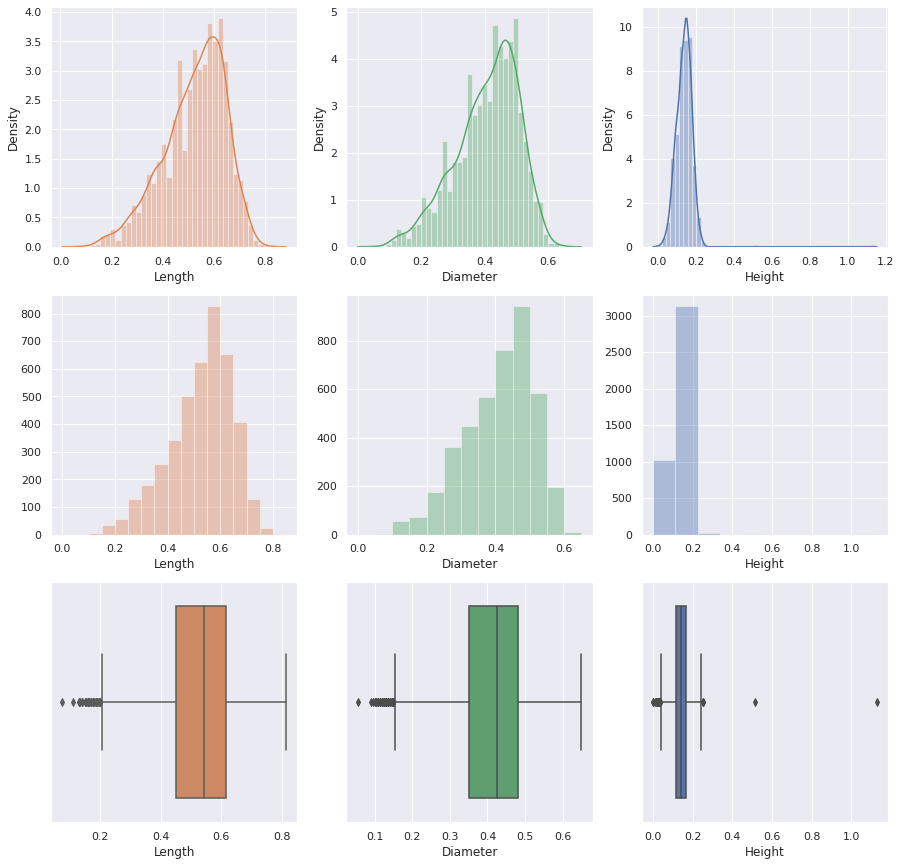

In [8]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])

Thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the *Height* attribute: 

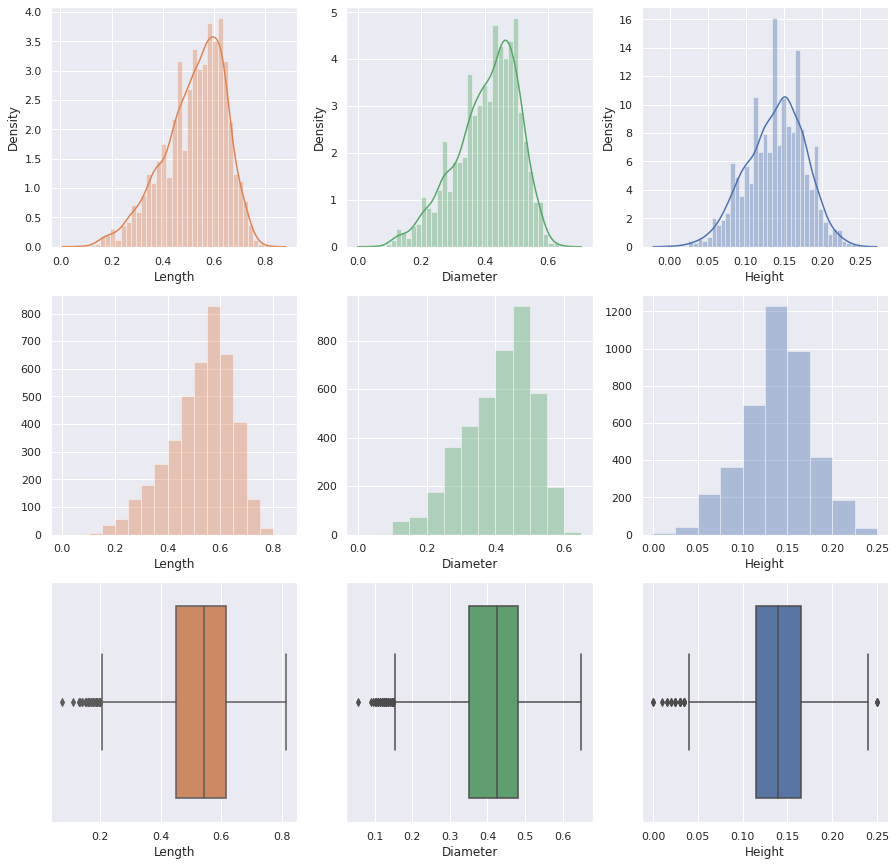

In [9]:
# removing outliers 
abalone = abalone[abalone['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])

### 3.3. Weight Attributes

The weight attributes were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger. 

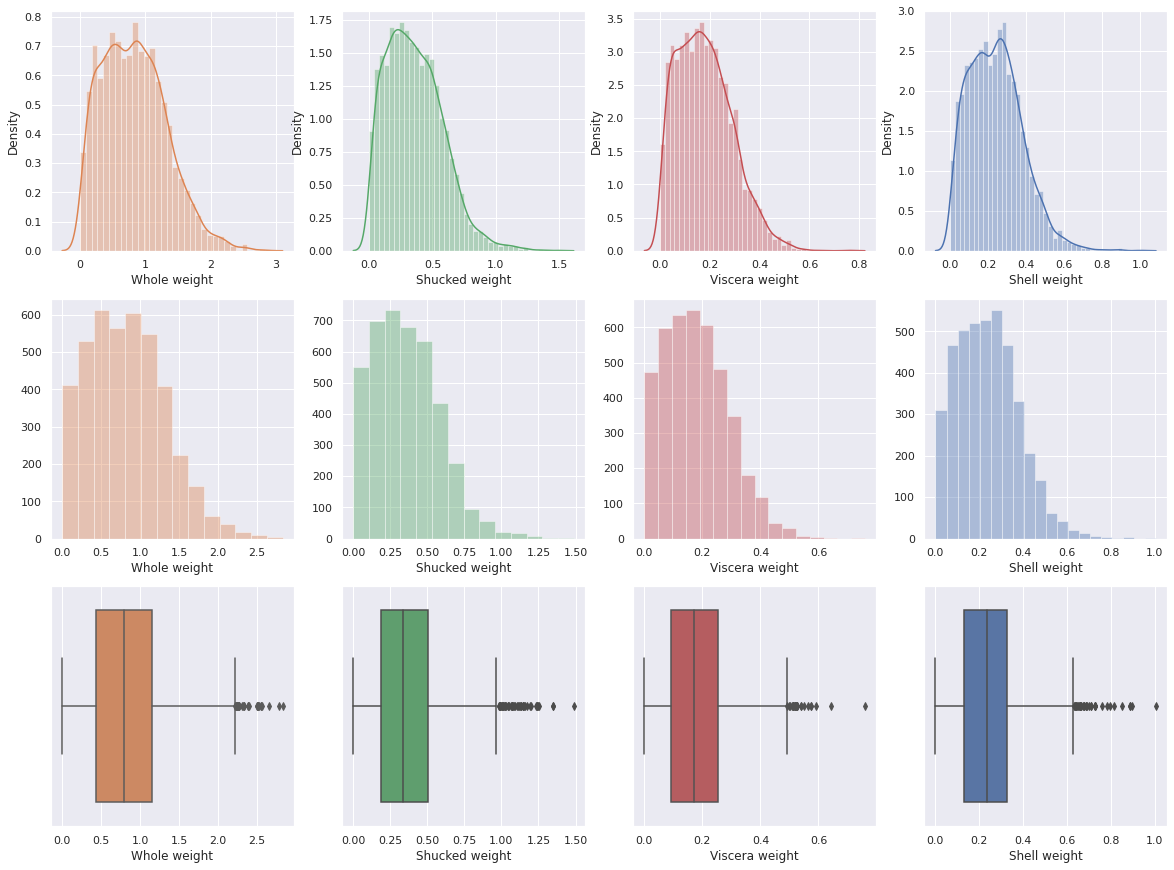

In [10]:
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shell weight'], color=colors[i % cols])

### 3.4. Sex

The *Sex* attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

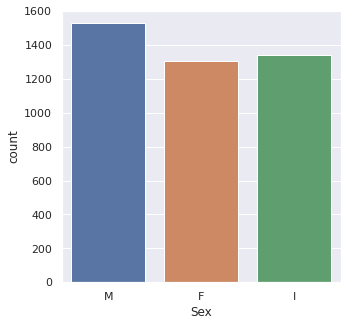

In [11]:
plt.figure(figsize=(5,5))
_ = sns.countplot(abalone.Sex)

## 4. Multivariate Analysis

In this section we analyzed how the dataset attributes are related and how the independent variables influences the target variable. Our first step in the multivariate analysis was to visualize the correlation matrix in a heatmap:

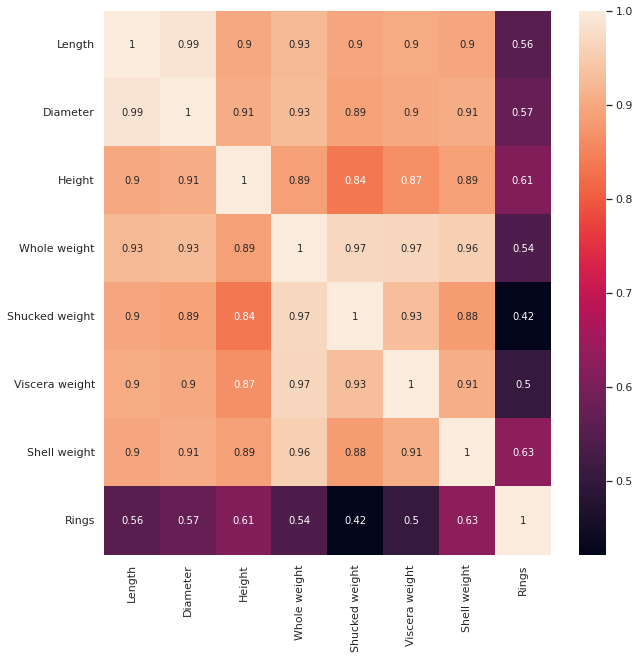

In [12]:
plt.figure(figsize=(10, 10))
corr = abalone.corr()
_ = sns.heatmap(corr, annot=True)

Analyzing the correlation matrix, we notice that *Height* and *Shell weight* are the attributes that most correlates to *Rings*. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with *Rings*:

<Figure size 1440x360 with 0 Axes>

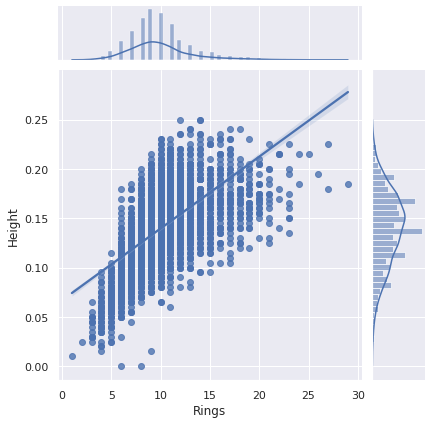

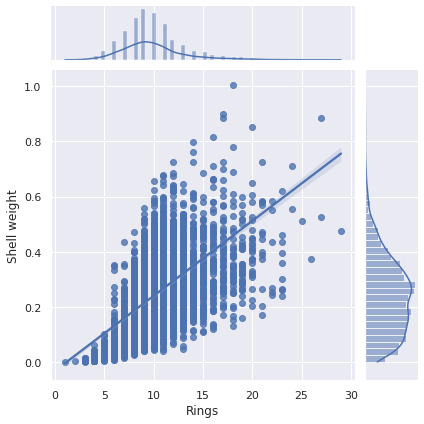

In [13]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')

We notice an interesting pattern: for lower values of *Rings* we have concentrated values of *Height* and *Shell weight*. As the value of *Rings* increases, the scatterplot becames larger, and for the highest values of *Rings* it become disperse. 

### 4.1. How correlation varies with the number of rings ?

Based on the previous analysis, we decided to investigate the variation of the correlation regarding the number of rings in more detail. We tested for many values, and found that the region delimited by *Rings < 10* has greater correlation between the independent attributes and the target variable.

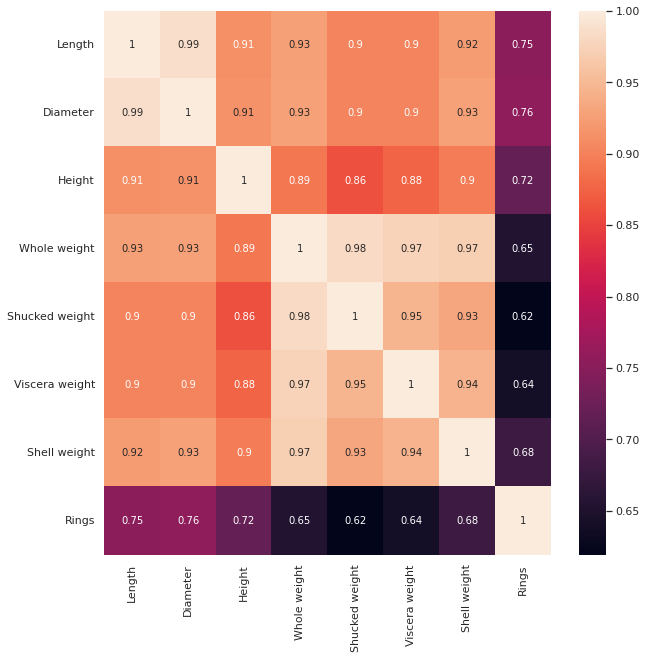

In [14]:
i_abalone = abalone[abalone['Rings'] < 10]

plt.figure(figsize=(10, 10))
corr = i_abalone.corr()
_ = sns.heatmap(corr, annot=True)

In the following plots we observe the positive correlation between the *Size* attributes and *Rings*:

<Figure size 1440x360 with 0 Axes>

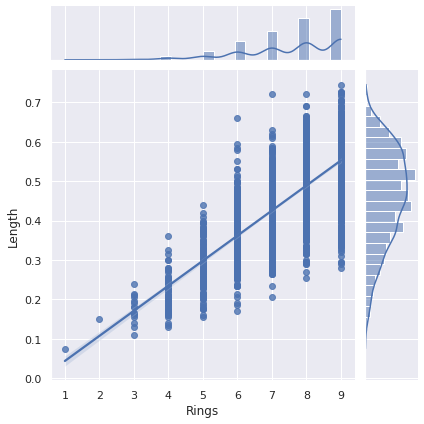

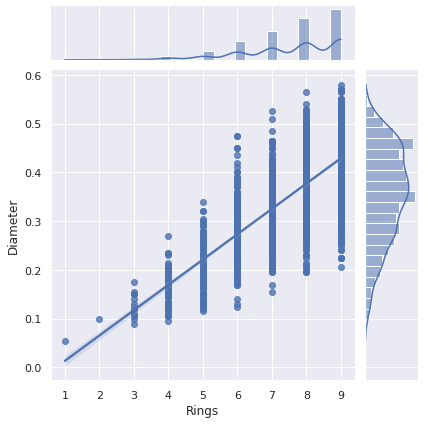

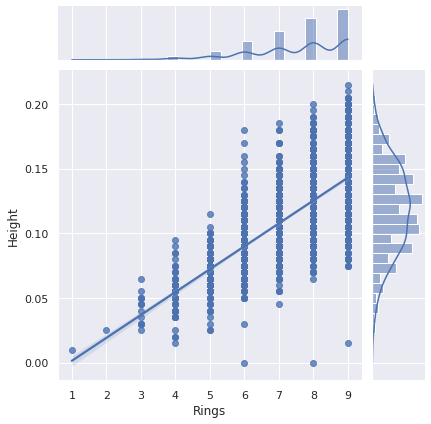

In [15]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

The violin plots bellow show that the median of *Size* attributes increases as instances are grouped by *Rings*: 

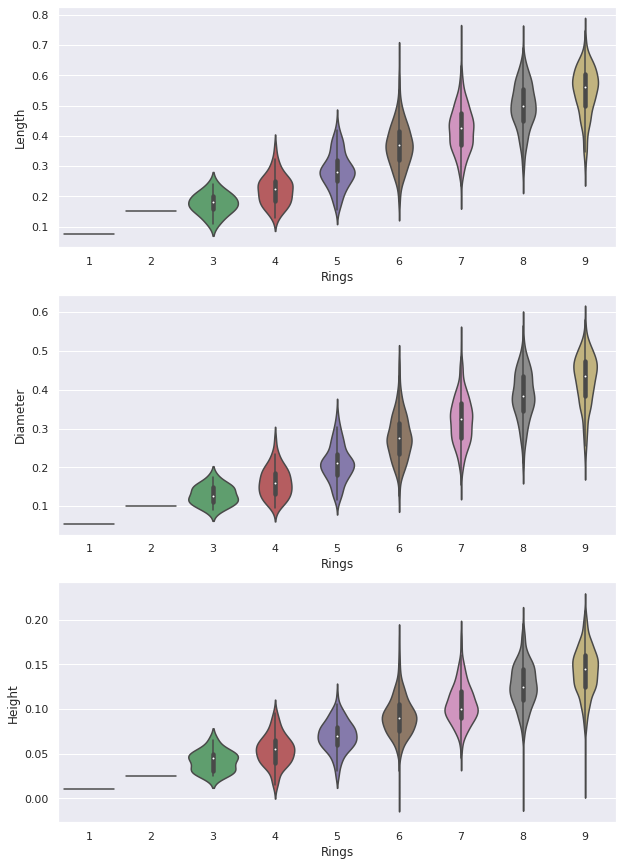

In [16]:
plt.figure(figsize=(10, 15))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Rings', y='Length')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Rings', y='Diameter')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Rings', y='Height')

We observe a similar result where comparing *Height* and *Shell weight* to *Rings*:

<Figure size 1440x360 with 0 Axes>

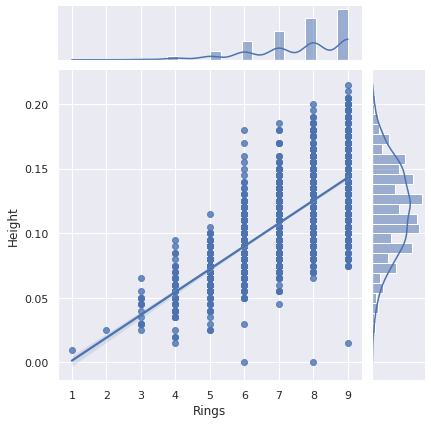

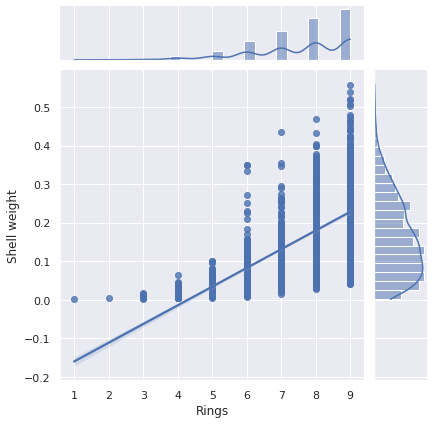

In [17]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone, x='Rings', y='Height',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg')

On the other hand, when we consider only samples with more than 10 *Rings* we observe that correlation decays drastically to near 0 (zero):

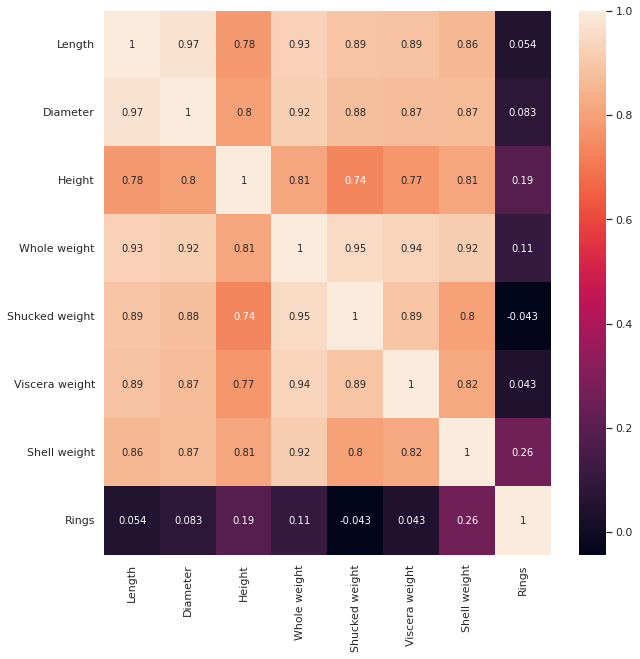

<Figure size 1440x720 with 0 Axes>

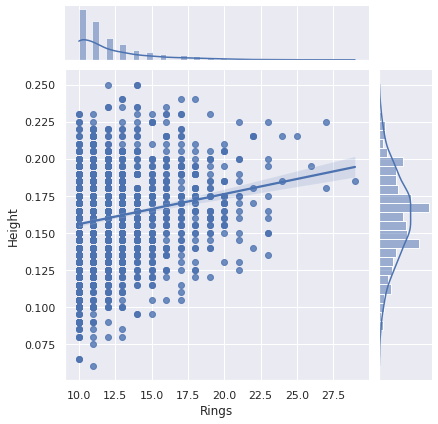

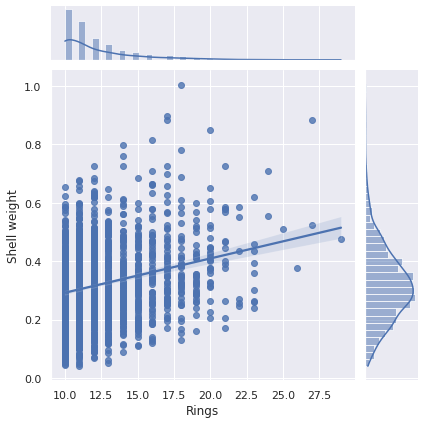

In [18]:
a_abalone = abalone[abalone['Rings'] >= 10]

plt.figure(figsize=(10, 10))
corr = a_abalone.corr()
_ = sns.heatmap(corr, annot=True)

plt.figure(figsize=(20, 10))

_ = sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg')
_ = sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg')

These results suggest that abalones grows in size and weight until a certain age, near 10 years. After this age their size and age remains stable in function of age, depending more on environmental factors.

### 4.2. Influence of Sex on attributes

Finally, we analyze how the *Sex* category influences the distribution of variables *Rings*, *Height* and *Shell weight*. Our objective is learn if the different categories of abalones have different distribution parameters or even form. To accomplish this objective, we visualize the distribution of each one of these parameters in relation to *Sex*. Finally, we analyze how the different *Sex* categories of abalones influence the correlation of *Rings*, *Height* and *Shell weight*.

Our first step is to analyze how *Sex* categories influence the number of *Rings*. We observe that the median of *Rings* for the *I* category is lower than the median for *M* and *F* categories.

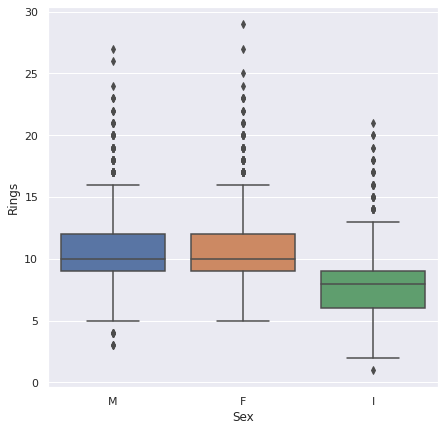

In [19]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Rings')

However, the form of the distribution remains similar: samples are concentrated around the mean of the distribution. The difference is that for *Infant* abalones the mean of *Rings* is lower.

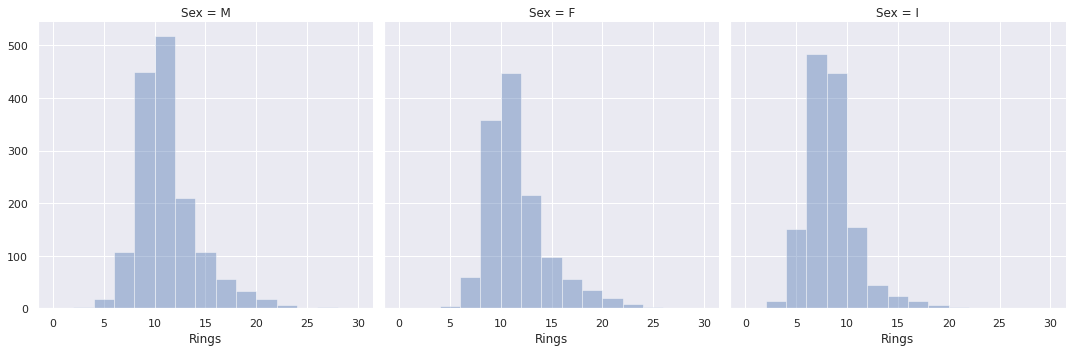

In [20]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

The same pattern is observer for *Height*:

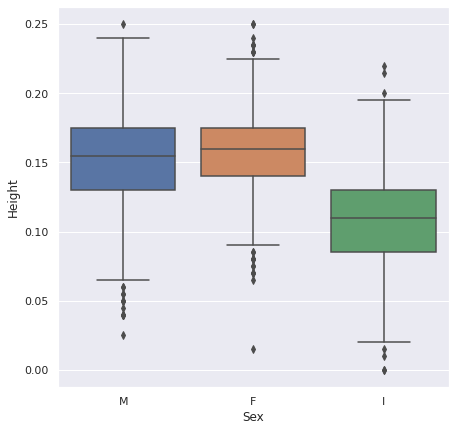

In [21]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Height')

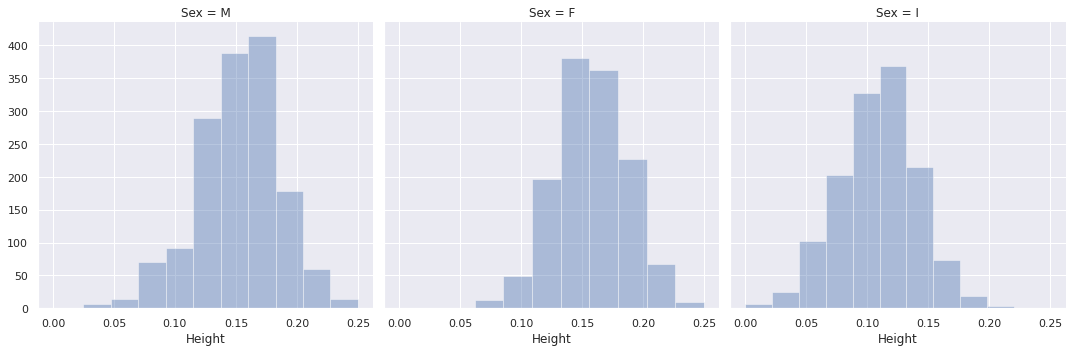

In [22]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

and *Shell weight*:

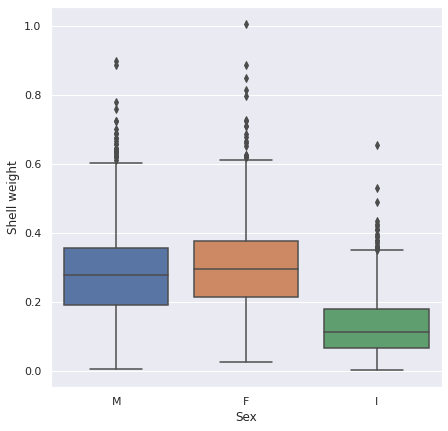

In [23]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Shell weight')

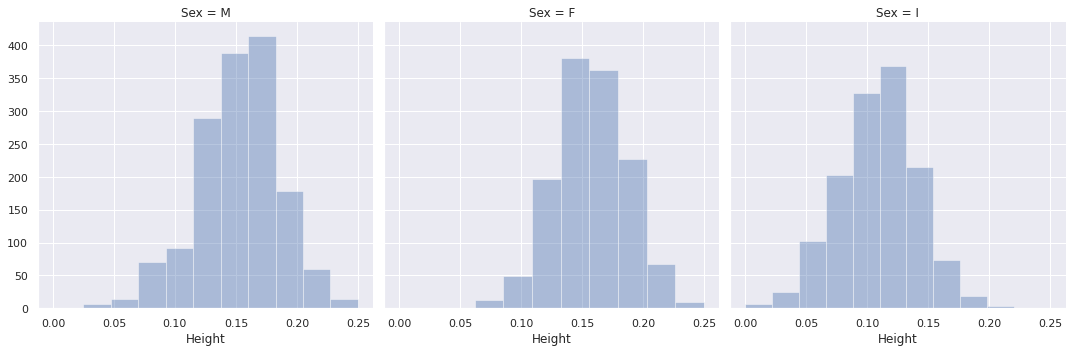

In [24]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

Finally, we analyze how the categories influence the correlations *Ring* x *Height* and *Ring* x *Shell weight*. We already concluded that these attributes has stronger correlation for lower values of *Rings*. Because *Infant* abalones have lower values of *Rings*, the consequence is that *Height* and *Shell weight* have stronger correlation to rings. Observing the regression curve for the *Infant* category, we notice that its inclination is closer to 45°.  

<Figure size 1440x360 with 0 Axes>

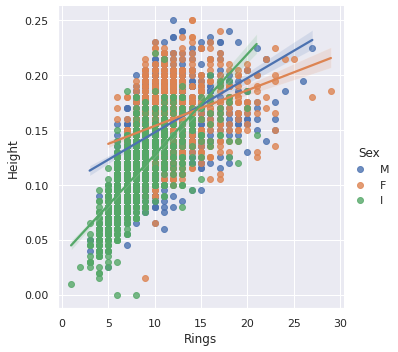

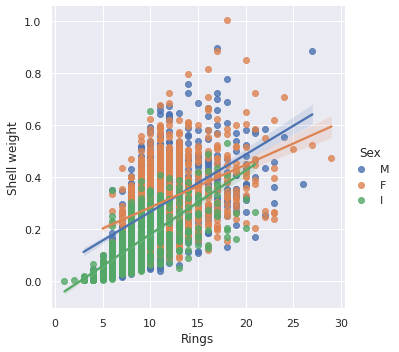

In [25]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=abalone, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=abalone, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

## 5. Conclusion

* By observing the correlation between the target attribute *Rings* and the indepent variables, we conclude that it is possible to build a model to predict the target value in function of the independent attributes.
* The weight of the Abalones varies proportional to their sizes
* There's no significant differences in size, weight and numbers of rigns between male/female abalones
* The Infant Abalones groups presents lower mean values of size, weight and number of rings 
* The weight and height of abalones varies accordingly to age until the adult age, after adult life size and weight stops varying, and after 16.5 years (15 rings) these measurements aren't correlated.